In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Task 1 & 2 - Downloading and Loading the Dataset

In [67]:
df = pd.read_csv('D:\mall_customers.csv')

In [68]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df.shape

(200, 5)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [71]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Task 3 - Visualizations

# 3.1 - Univariate Analysis

In [72]:
sns.displot(df['Age'], color = 'darkred')

In [73]:
sns.countplot(df.Gender , data = df, palette = 'rainbow')

<AxesSubplot:xlabel='Gender', ylabel='count'>

In [74]:
sns.distplot(df['Annual Income (k$)'], color = 'darkred')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

In [75]:
sns.distplot(df['Spending Score (1-100)'], color = 'darkred')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

# 3.2 - Bi-Variate Analysis

In [76]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

In [92]:
g = sns.FacetGrid(data = df, col= 'Gender', height = 4)
g.map(sns.distplot, 'Spending Score (1-100)')

In [78]:
g = sns.FacetGrid(data = df, col= 'Gender', height = 4)
g.map(sns.distplot, 'Annual Income (k$)')

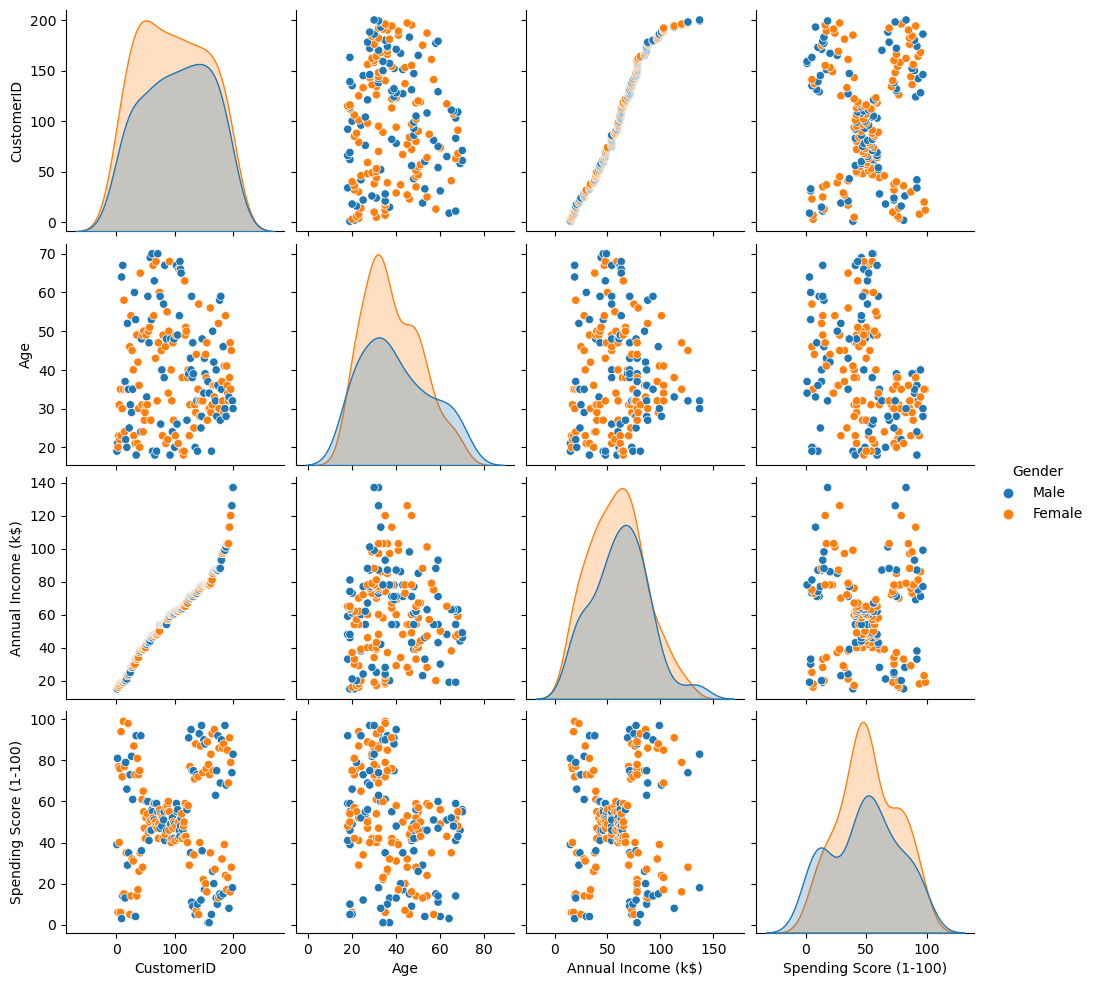

<Figure size 2000x2000 with 0 Axes>

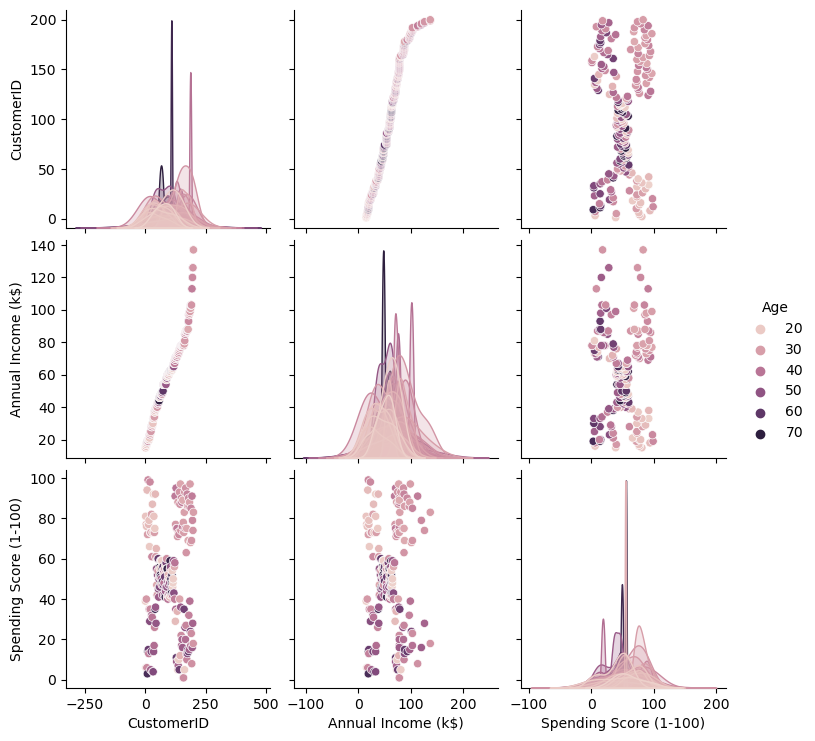

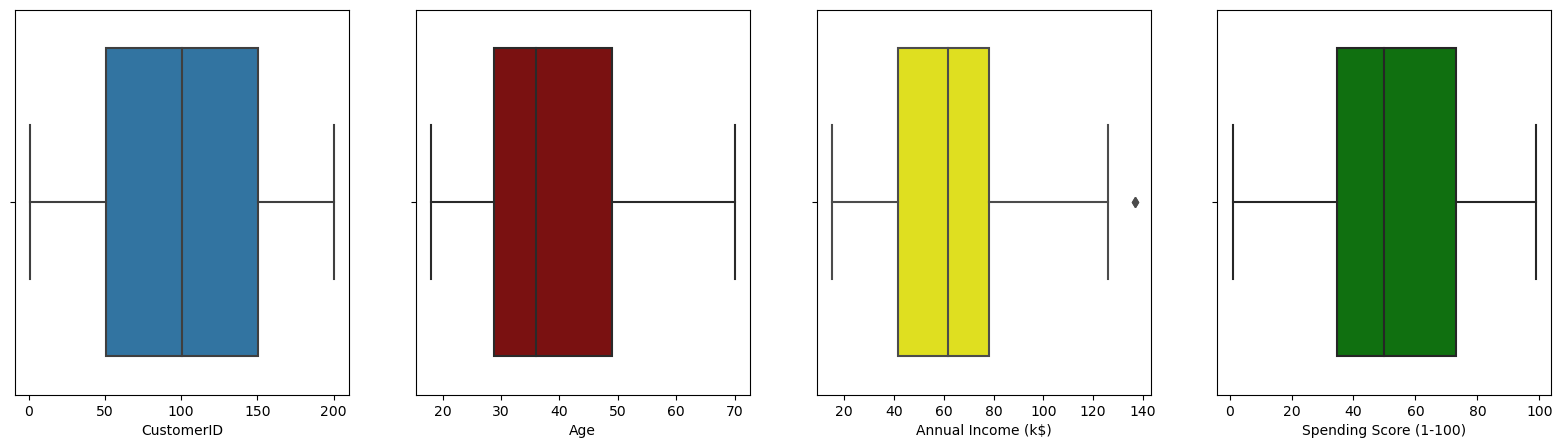

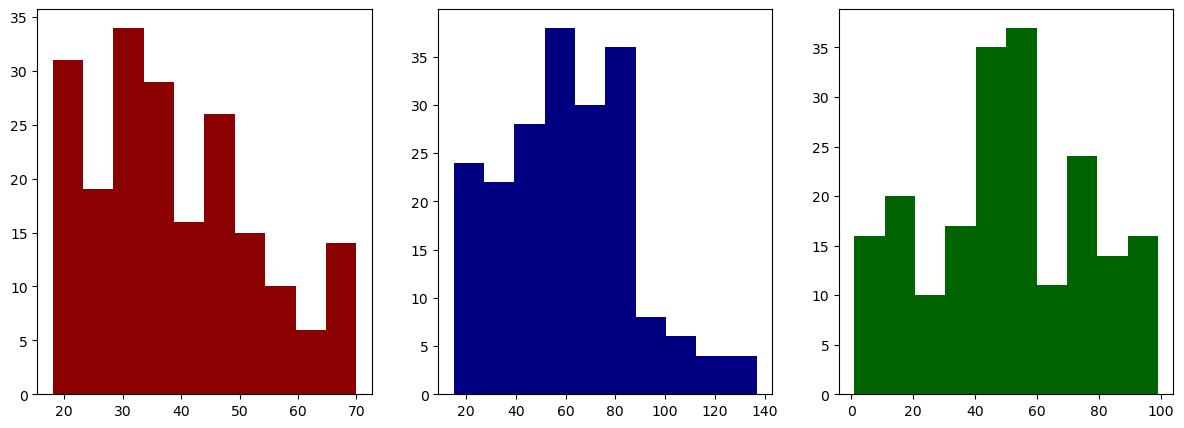

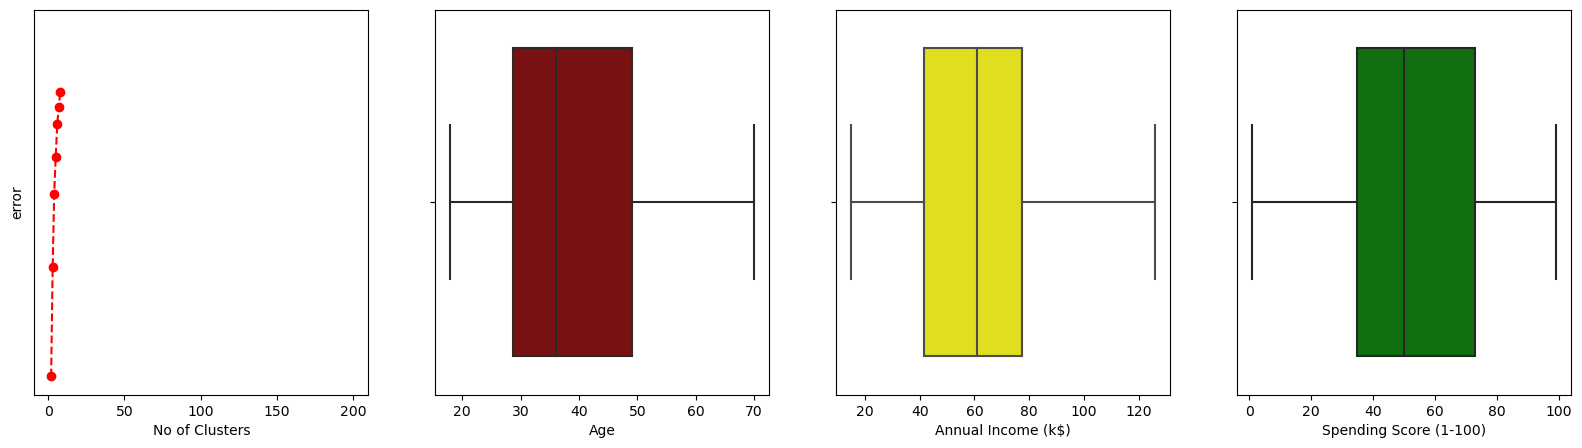

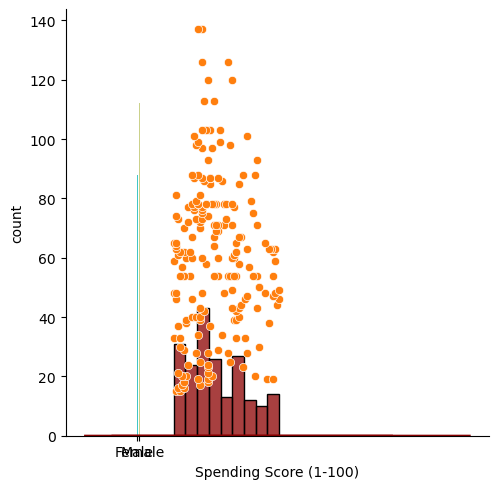

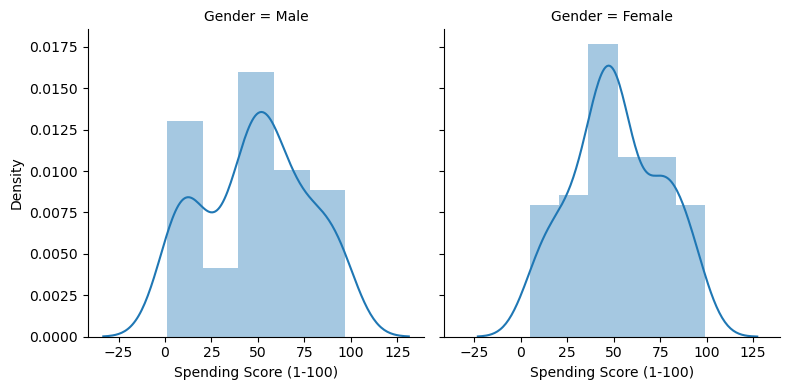

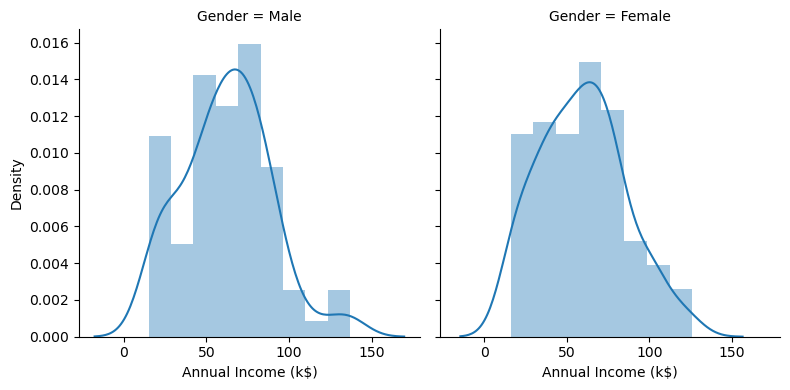

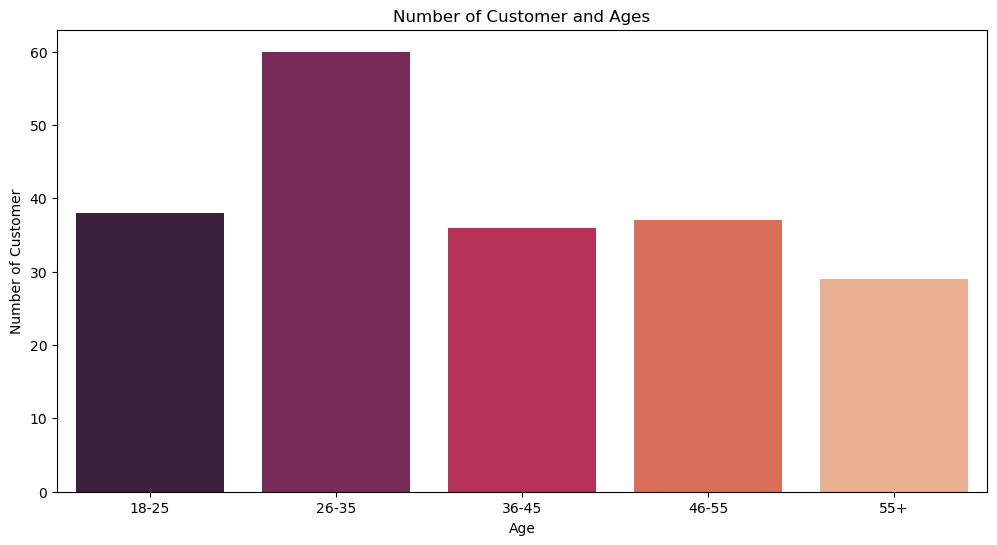

In [79]:
#Plotting the features of the dataset to see the correlation between Number of Customer and Ages
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

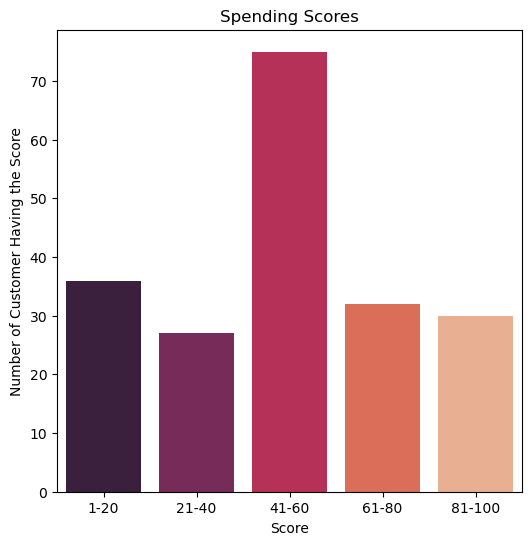

In [80]:
#Plotting the features of the dataset to see the correlation between Spending Scores ie Score & Number of Customer 
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
plt.figure(figsize=(6,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# 3.3 - Multi-Variate Analysis

In [81]:
sns.pairplot(df,hue='Gender')

In [82]:
plt.figure(figsize=(20,20))
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Gender', z='Annual Income (k$)',#hue='Gender')
color='Spending Score (1-100)')
fig.show()

In [83]:
sns.pairplot(df,hue='Age')

# Task 4 - Descriptive Statistics

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [85]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [86]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

# Task 5 - Handle the Missing values

In [87]:
df.isna().sum() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Task 6 - Find Outliers and Replacing

In [89]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Age'], color = 'darkred')

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Annual Income (k$)'], color = 'yellow')

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Spending Score (1-100)'], color = 'green')

plt.subplot(1, 5, 1)
sns.boxplot(x=df['CustomerID'])

<AxesSubplot:xlabel='CustomerID'>

In [90]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 1)
plt.hist(x=df['Age'],color = "darkred" )

plt.subplot(1, 5, 2)
plt.hist(x=df['Annual Income (k$)'],color = "navy" )

plt.subplot(1, 5, 3)
plt.hist(x=df['Spending Score (1-100)'],color = "darkgreen" )

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

In [91]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Annual Income: ',df['Annual Income (k$)'].skew())
print('skewness value of Spending Score: ',df['Spending Score (1-100)'].skew())

skewness value of Age:  0.48556885096681657
skewness value of Annual Income:  0.3218425498619055
skewness value of Spending Score:  -0.047220201374263374


In [27]:
quantile = df.quantile(q = [0.25, 0.75])
quantile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [28]:
quantile.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [29]:
quantile.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [30]:
IQR = quantile.iloc[1] - quantile.iloc[0]
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [31]:
upper = quantile.iloc[1] + (1.5 *IQR)
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [32]:
lower = quantile.iloc[0] - (1.5* IQR)
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [33]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [34]:
df['Annual Income (k$)'].max()

137

In [35]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] > 132.750, 60.55, df['Annual Income (k$)'])

In [36]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Age'], color = 'darkred')

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Annual Income (k$)'], color = 'yellow')

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Spending Score (1-100)'], color = 'green')

plt.subplot(1, 5, 1)
sns.boxplot(x=df['CustomerID'])

<AxesSubplot:xlabel='CustomerID'>

# Task 7 - Check for Categorical columns and perform encoding

In [37]:
df.select_dtypes(include='object').columns

Index(['Gender'], dtype='object')

In [38]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df.Gender=l.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# Task 8 - Scaling the data

In [40]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [41]:
x_scaled = pd.DataFrame(scale.fit_transform(df),columns= df.columns)
x_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959


# Task 9 - Perform any of the clustering algorithms

In [42]:
from sklearn.cluster import KMeans
error = []
k = list(range(2,9))

for i in k:
  kmeans = KMeans(n_clusters = i , init = 'k-means++')
  kmeans.fit(df)
  error.append(kmeans.inertia_)
error

[381507.64738523855,
 268024.53128286806,
 191557.7809904702,
 153339.098740409,
 119166.15727643928,
 101320.93600180376,
 85717.76124902876]

In [43]:
plt.plot(k,error, 'ro--')
plt.xlabel('No of Clusters')
plt.ylabel('error')

Text(0, 0.5, 'error')

In [44]:
model = KMeans(n_clusters = 4)
model.fit(df)

KMeans(n_clusters=4)

In [45]:
mb=pd.Series(model.labels_)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [46]:
target=model.predict(df)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

# Task 10 - Add the cluster data with the primary dataset

In [47]:
df['Cluster']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.0,39,4
1,2,1,21,15.0,81,2
2,3,0,20,16.0,6,4
3,4,0,23,16.0,77,2
4,5,0,31,17.0,40,4


In [48]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120.00,79,0
196,197,0,45,126.00,28,3
197,198,1,32,126.00,74,0
198,199,1,32,60.55,18,3
199,200,1,30,60.55,83,0


# Task 11 - Split the data into dependent and independent variables

In [49]:
X=df.drop('Cluster',axis=1)
y=df['Cluster']
y

0      4
1      2
2      4
3      2
4      4
      ..
195    0
196    3
197    0
198    3
199    0
Name: Cluster, Length: 200, dtype: int32

# Task 12 - Split the data into training and testing

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 5)
(160,)
(40, 5)
(40,)


In [52]:
X_train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,80,0,49,54.0,42
197,198,1,32,126.0,74
38,39,0,36,37.0,26
24,25,0,54,28.0,14
122,123,0,40,69.0,58


In [53]:
X_test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,96,1,24,60.0,52
15,16,1,22,20.0,79
30,31,1,60,30.0,4
158,159,1,34,78.0,1
128,129,1,59,71.0,11


In [54]:
y_test.head()

95     1
15     2
30     4
158    7
128    7
Name: Cluster, dtype: int32

# Task 13 - Build the Model

In [55]:
from sklearn.naive_bayes import GaussianNB
model =GaussianNB()

In [56]:
model.fit(X_train,y_train)

GaussianNB()

# Task 14 - Train the Model

In [57]:
y_pred = model.predict(X_train)
y_pred

array([5, 0, 4, 4, 1, 0, 2, 2, 6, 1, 1, 0, 2, 7, 1, 5, 7, 1, 3, 1, 0, 1,
       2, 4, 2, 1, 5, 0, 1, 7, 5, 6, 7, 2, 1, 1, 4, 6, 1, 1, 4, 5, 5, 0,
       0, 1, 6, 4, 3, 5, 4, 6, 1, 2, 2, 3, 6, 4, 2, 1, 4, 4, 7, 6, 1, 7,
       4, 5, 1, 7, 3, 4, 3, 6, 5, 6, 5, 4, 6, 4, 4, 1, 6, 7, 2, 2, 3, 6,
       5, 2, 3, 5, 1, 7, 5, 7, 2, 1, 5, 6, 3, 3, 0, 5, 5, 4, 2, 1, 1, 5,
       3, 0, 1, 4, 2, 5, 0, 6, 2, 5, 0, 7, 0, 0, 5, 5, 1, 5, 3, 5, 5, 1,
       2, 5, 7, 3, 6, 2, 6, 0, 2, 5, 6, 7, 6, 1, 1, 1, 1, 5, 1, 0, 4, 3,
       5, 1, 4, 1, 0, 1])

In [58]:
model.score(X_train,y_train)

0.99375

# Task 15 - Test the Model

In [59]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 4, 7, 7, 1, 5, 3, 3, 2, 5, 3, 0, 5, 3, 0, 5, 7, 5, 5, 7, 4,
       7, 1, 5, 5, 1, 5, 6, 7, 2, 4, 5, 5, 7, 1, 6, 6, 3, 5])

In [60]:
model.score(X_test,y_test)


1.0

# Task 16 - Measure the performance using Evaluation Metrics

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

1.0

In [62]:
y_pred1 = model.predict(X_train)
accuracy_score(y_train,y_pred1)

0.99375

In [63]:
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [64]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7
Cluster,,,,,,,,
0,2,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0
3,0,0,0,5,0,0,0,0
4,0,0,0,0,3,0,0,0
5,0,0,0,0,0,12,0,0
6,0,0,0,0,0,0,3,0
7,0,0,0,0,0,0,0,7


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

